`교안tf2-03-1Tensorflow와_Keras.pdf (202201`

# Tensorflow와 Keras

텐서플로우는 대규모 수치 계산 라이브러리로 텐서는 다차원 행렬 계산을 의미한다. 딥러닝의 특징데로 계산식을 만들고 데이터를 넣어 실행하는 구조를 가지고 있다.

다차원 행렬 계산 라이브러리로서 영상처리 라이브러리도 제공하고, OpenCV 라이브러리와 함게 사용된다.


In [1]:
# 텐서플로 2.0 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
from tensorflow import keras
print(tf.__version__, keras.__version__)

2.9.1 2.9.0


In [2]:
import numpy as np
import pandas as pd

In [3]:
# Google Colab 운영체제 확인
import platform
print(platform.platform())

Linux-5.10.102.1-microsoft-standard-WSL2-x86_64-with-glibc2.31


In [4]:
# 외부라이브러리
import sys
sys.path.append('../../Libraries') 

In [5]:
from lib_ml_visual import get_clf_eval

# 1. 텐서플로우와 신경망

퍼셉트론의 한계인 AND, OR, Xor 연산을 신경망으로 할 수 있다.

## 01. 랜덤한 수 생성

신

In [ ]:
# 랜덤한 수 얻기 (균일 분포)
rand = tf.random.uniform([1],0,1)
print(rand)

In [ ]:
type(rand)

In [ ]:
# `랜덤한 수 여러 개 얻기 (균일 분포)
rand = tf.random.uniform([4],0,1)
print(rand)

In [ ]:
# 랜덤한 수 여러 개 얻기 (정규 분포)
rand = tf.random.normal([4],0,1)
print(rand)

## 02. 뉴런 만들기

시그모이드 함수 선언

In [ ]:
# 3.10 sigmoid 함수
import numpy as np
import math


def sigmoid(x):
    return 1 / (1 + math.exp(-x))

뉴런에 임의의 수를 입력

시그모이드 입력에 x 값고 임의의 가중치 w로 정규분포한 값을 입력하면 출력은 시그모이드 계산 결과이다. 

In [ ]:
# 3.11 뉴런의 입력과 출력 정의
x = 1
y = 0
w = tf.random.normal([1],0,1)

output = sigmoid(x * w)
print(output)

#### softmax

활성화 함수로 softmax를 쓰는데 소프트맥스 함수는 여러 유닛의 출력값을 정규화하기 위한 것이다. 

 - [참고 Softmax 함수](/my/nbconvert/html/%EC%8B%9C%EC%9E%91%ED%95%98%EC%84%B8%EC%9A%94_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B02/%EC%B0%B8%EA%B3%A0-%ED%99%9C%EC%84%B1%ED%99%94.ipynb?download=false#Softmax-%ED%95%A8%EC%88%98)



지수 함수는 큰 값을 강조하고 작은 값을 약화하는 효과가 가있다ㅣ. 소프트맥스는 분류 문제나 언어 RNN 에서 다음 토큰 예측, 강화 학습에서 에이전트 행동 확률을 구하는 등 결과 값으로 확률이 필요한 다양한 분야에서 쓰인다.

In [ ]:
#  SoftMax 그래프
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.arange(-2, 2, 0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, x, 'b-', label='y=x')
plt.plot(x, e_x, 'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
# 에러 = 기대출력 - 출력
y - output

#### 경사하강법 적용

가중체에 입력, 에러 및 학습률을 곱해서 더해준다.

>  아래는 에러가 발생...

In [ ]:
# 3.12 경사 하강법을 이용한 뉴런의 학습
lr = 0.1 # 학습률
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * lr * error
    
    if i % 100 == 99:
        print(i, error, output)

x=0 일 때 y=1 을 얻는 뉴런의 학습

In [ ]:
# x=0 일 때 y=1 을 얻는 뉴런의 학습
x = 0
y = 1
w = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

편향

In [ ]:
#  x=0 일 때 y=1 을 얻는 뉴런의 학습에 편향을 더함
x = 0
y = 1

w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)

for i in range(1000):
    output = sigmoid(x * w + 1 * b)
    error = y - output
    w = w + x * 0.1 * error
    b = b + 1 * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

## 03. 첫번째 신경망 네트워크 : AND

In [ ]:
# True, False 의 정수값 확인
print(int(True))
print(int(False))

In [ ]:
# 3.16 첫번째 신경망 네트워크 : AND
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)

In [ ]:
b_x = 1

for i in range(2000):
    error_sum = 0

    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum, output)

In [ ]:
w, b  # 해로 구한 기울기, 절편

이렇게 학습한 네트워크가 정상적으로 동작하는지 확인해 보자.


이렇게 얻은 값에 시그모이드를 취하면 최종값이 된다. 중간 합계와 최종 출력을 평가해 보면, 가중치 2 값으로 중간값 계산이 0에 가까와 지기 때문에 시그모이드 적용한 출력이 0.5에 가까와 지는 것이다.

In [ ]:
# AND 네트워크의 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

In [ ]:
# AND 네트워크의 평가
for i in range(4):
    _sum = np.sum(x[i]*w)+b
    print('X:', x[i], 'Y:', y[i], 'Sum:', _sum, 'Output:', sigmoid(_sum))

In [ ]:
w.numpy(), b.numpy()

## 04. 두번째 신경망 네트워크 : OR

In [ ]:
# 두번째 신경망 네트워크 : OR
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)


In [ ]:
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

In [ ]:
# 3.22 OR 네트워크의 평가
for i in range(4):
    _sum = np.sum(x[i]*w)+b
    print('X:', x[i], 'Y:', y[i], 'Sum:', _sum, 'Output:', sigmoid(_sum))

평가를 해본 결과 중간 계산 값이 1보다 큰 값은 출력 Y 값은 1 근처 임을 알 수 있다.

## 05. 세번째 신경망 네트워크 : XOR

In [ ]:
# 세번째 신경망 네트워크 : XOR

x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)

In [ ]:
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w)+b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

에러 값이 줄다가 어느 순간 변하지 않는다.

XOR 네트워크의 평가


w, b 값을 확인해 보면 아래 같아서 w의 첫번째 입력이 영향을 크게 미치고, 편향도 거의 영향이 없을 것 으로 보인다. 


In [ ]:
print('w:', w)
print('b:', b)


이렇게 얻은 값에 시그모이드를 취하면 최종값이 된다. 중간 합계와 최종 출력을 평가해 보면, 가중치 2 값으로 중간값 계산이 0에 가까와 지기 때문에 시그모이드 적용한 출력이 0.5에 가까와 지는 것이다.

In [ ]:
# XOR 네트워크의 평가
for i in range(4):
    _sum = np.sum(x[i]*w)+b
    print('X:', x[i], 'Y:', y[i], 'Sum:', _sum, 'Output:', sigmoid(_sum))

평가를 해본 결과 중간 계산 값이 0에 가까와 지므로 출력 Y 값은 0.5 근처 임을 알 수 있다.

이것을 AND 중간값 평가와 비교하면, 2개의 가중치가 비슷해서 입력 2개는 거의 비슷한 중요도를 갖는다. 편향은 음수로 중간값 계산을 음수로 보내는 경향을 갖고 두 가중치를 합해야 음수 편향을 이겨낸다.


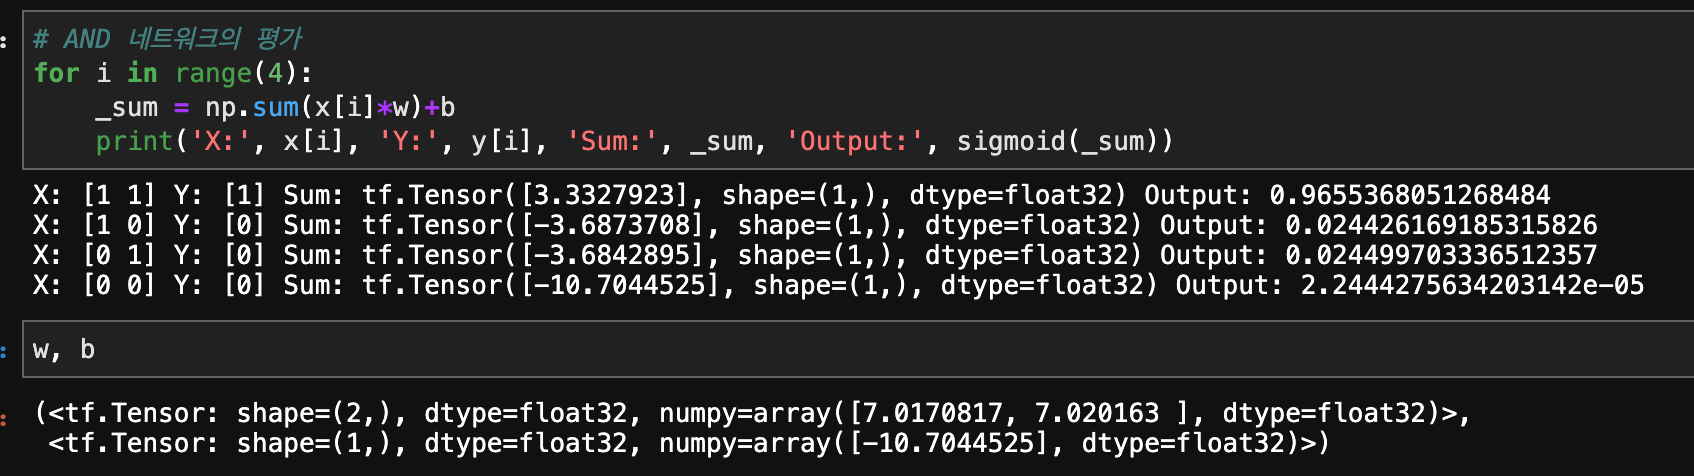


XOR의 문제는 인공지능의 겨울을 가져왔다. 하나의 퍼셉트론으론 XOR 문제를 해결 할 수 없다는 것이다.

## 06. Keras 딥러닝 XOR 학습


여기서 kera 를 사용해 세 개의 퍼셉트론과 뉴런을 사용해 본다. 아래 같이 네트워크를 만든다.

1. 모델

 - 케라스는 딥러닝 계산을 위해 추상 클래스인 model 이 있ㄷ.
 - 딥러닝 계산을 위한 여러 함수, 변수 묶음

2. Sequencial

 - 모델중 가장 기본 구조.
 - 순차적으로 레이어(뉴런과 뉴런이 합쳐진 단위)를 직선으로 배치


시퀀셜 모델로 Dense 레이어를 사용해 정의한다. Dense 레이어는 가장 기본 레이어이다.

```python

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
```


units 로 레이어의 뉴런의 수를 지정한다. 뉴런의 수가 많아지면 일반적으로 레이어 성능이 좋아지지만 계산량 또한 많아지고 메모리도 많이 차지한다.


<img src='https://i.imgur.com/IWuQn1b.jpg' width='400'>

이렇게 정의된 XOR 네트워크 구조 Dense 네트워크는 편향을 포함하고 있다.

<img src='https://i.imgur.com/absgfjI.png' width='450'>

이렇게 구성된 시퀀셜 네트워크의 출력, Dense 레이어의 파라미터 수는 ***`(입력측 뉴런 수 + 1) x (출력측 뉴런 수)`*** 식으로 구한다.

1. 레이어 1
 - 입력 2, 출력 2: (2+1)x2

2. 레이어 2

- 입력 2, 출력 1: (2+1)x1

In [ ]:
import numpy as np
import tensorflow as tf

# tf.keras 를 이용한 XOR 네트워크 계산
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

이제 모델을 구성하기 위해서 compile 로 최적화 함수와 손실함수를 지정한다.
  - 손실함수(loss function): 훈련 데이터에서 신경망 성능을 측정하는 방법
  - 옵티마이저: 입력 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘
  - 측정 지표: 정확도

In [ ]:
# model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.3), loss='mse')

In [ ]:
model.summary()

모델에 데이터를 주입하고 학습을 시작한다. epoch 는 훈련 데이터를 반복 학습 시키는 횟수이다. 배치 크기는 에포크에 학습 시키는 수이다.

In [ ]:
# tf.keras 를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

학습이 끝나고 네트워크를 평가해 보자. y 기대 값에 가까운 결과를 얻고 있다.

In [ ]:
# tf.keras 를 이용한 XOR 네트워크 평가
model.predict(x)

모델을 구성하는 파라미터에서 가중치와 편향을 출력해 보자. 케라스 모델에서 가중치는 `.weights` 이고, 입력과 레이어 또는 레이어 사이의 뉴런을 연결할 때 사용되는 가중치는`.kernel` 이고, 편향과 연결된 가중치는 `.bias` 이다.



In [ ]:
#  XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
    print(weight)

네트워크에 가중치 숫자가 많아서 구분을 위해 편의상 가중치에 첨자를 붙여 표시하는데, 레이어의 순서데로 위첨자를 붙이고, 아래 첨자는 각 뉴런의 순서에 맞게 차례로 붙인다. 앞의 그림 처럼 Dense 레이어에 편향까지 볼 수 있다.

<img src='https://i.imgur.com/3ECmHMQ.png' width='450'>

레이어에 뉴런이 많아지고 네트워크가 커지면 전체 상황을 파악할 방법이 필요하다.

### XOR 네트워크의 정보 시각화

학습이 잘 되는지 확인하기 위해서 측정치 metric 변화량을 나타내는 선 그래프이다. 손실을 선그래프로 그려보자.

모델 시각화: https://keras.io/ko/visualization/

history 객체를 얻을 수 있는데, 이 history 객체는 다양한 정보를 가지고 있습니다.
- acc: 매 epoch 마다의 훈련 정확도
- loss: 매 epoch 마다의 훈련 손실 값
- val_acc: 매 epoch 마다의 검증 정확도
- val_loss: 매 epoch 마다의 검증 손실 값

In [ ]:
print(history.history.keys())

In [ ]:
print(history.history['acc'])
print(history.history['loss'])
print(history.history['val_acc'])
print(history.history['val_loss'])

In [ ]:
# 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

---

# 2. 신경망을 위한 데이터

최근 머신러닝 시스템은 *텐서* 를 기본 데이터 구조로 사용한다. 텐서(tensor)는 데이터를 위한 컨테이너, 거의 수치형 데이터를 다루므로 숫자를 위한 컨테이너이다. 텐서는 임의 차원 개수를 가진 행렬로 행렬은 아래 같은 종류가 있다.

 - Scalar : 스칼라 텐서, 0차원 텐서, 0D텐서
 - Vector: 벡터, 1D텐서. 열을 축으로하는 1차원
 - Matrix: 행렬, 2D 텐서. 행과 열을 축으로하는 2차원.
 - tensor: 3차원

![image.png](https://i.imgur.com/PRAiV7j.png)

## 텐서의 종류

![image.png](https://i.imgur.com/Ehn05pP.png)

#### 스칼라 (0D tensor)

하나의 숫자 값을 담고 있는 텐서로서 0차원, 0D텐서이다. 0차원 텐서의 축의 개수는 0으로 축(ndim)을 랭크(rank)라고도 부른다.

In [ ]:
# 스칼라
x = np.array(1)
x

In [ ]:
x.shape, x.ndim, x

#### 벡터 (1D Tensor)

숫자 배열을 벡터, 1D 텐서라고 부른다. 1D 텐서는 하나의 축을 가진다.

In [ ]:
# 벡터
x = np.array([1,2,3,4])
x.shape, x.ndim, x

위 벡터는 4개의 요소를 가지고 있어서 5차원 벡터라고 부른다. ( 4D 텐서와 혼동하지 말것!)

#### 행렬 (2D Tensor)

행렬은 2차원으로 구성되어 2개의 축을 가진다.

In [ ]:
# 행렬
x = np.array([[1,2,3],[4,5,6],[7,8,9]])
x.shape, x.ndim, x

#### 3차원 배열 ( 3D Tensor)

배열의 3차원 축을 가진 배열을 3D Tensor라고 한다.

In [ ]:
# 텐서: 3d
x = np.array([[[1,2,3,4,5],
              [6,7,8,9,10]],
             [[0,-1,-2,-3,-4],
             [-5,-6,-7,-8,-9]]])
x.shape, x.ndim, x

#### 텐서의 속성

- 축/차원 (Rank): ndim
- 형 Shape: shape
- 데이터 타입: float32, uint8, float64 등

크기 size

In [ ]:
# 축(Axis, Rank), 차원
x.ndim

In [ ]:
# 행
x.shape

In [ ]:
# 크기
x.size

### 텐서 조작하기

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [ ]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

In [ ]:
# 10:100 사이 데이터
slice = train_images[10:100]
slice.shape, slice.ndim

In [ ]:
# 10:100 사이의 28x28 데이터를 추출
slice = train_images[10:100, :28, :28]
slice.shape, slice.ndim

In [ ]:
# 28x28 이미에서 오른쪽 14x14 만 추출
slice = train_images[:, 14:, 14:]
slice.shape, slice.ndim

### 배치 데이터

딥러닝 모델은 한 번에 전체 데이터를 처리하지 않고 데이터를 작은 배치(batch) 단위로 나누어 처리한다.

In [ ]:
#크기 128인 배치
batch = train_images[:128]

In [ ]:
#다음 크기 128인 배치
batch = train_images[128:256]
#n번째 배치
n = 10
batch = train_images[128 * n:128 * (n+1)]

### 실제 데이터의 텐서

- 벡터 데이터: (samples, feature) 크기 2D 텐서
- 시계열, 시퀀스 데이터: (samples, timsteps, feature) 크기 3D 텐서
- 이미지 데이터: (samples, height, width, channels) , (samples, channels, height, width) 크기의 4D 텐서
- 동영상 데이터: (samples, frames, height, width, channels), (samples, frames, channels, height, width) 


#### 벡터 데이터

(samples, feature) 형식으로 구성된다.
 - 10만명의 나이/우편번호/소득 으로 구성된 인구 데이터: (100000, 3) 크기 텐서
 - 텍스트에 공통단어 2만개에서 단어의 등장횟수로 표현된 경우: (500, 20000) 

#### 시계열/시퀀스 데이터

데이터의 시간/순서가 중요하면 시간축을 포함해 (samples, timsteps, feature) 크기 3차원 텐서로 구성된다.
 - 주식 가격 데이터: 1분마다 주식가격, 1분마다 최고/최소 가격. 
     - 하루 거래 (390,3)크기 2D텐서
     - 연간 250일 (250, 390, 3) 크기 3D텐서
 - 트윗 데이터 세트: 트윗은 128개 알파벳, 280 문자로. 128개 2진벡터로 구성( 280, 128)
     - 100만개 트쉿은 (1000000, 280, 128) 텐서로 구성

####  이미지 데이터 - 4D 텐서
이미지는 높이/너비/컬러의 3차원. 흑백도 높이/너비/컬러.

 - 128개 256x256 크기 흑백 배치: (128, 256, 256, 1) 
 - 128개 256x256 크기 컬러 배치: (128, 256, 256, 3)
 - 이미지 텐서 크지 지정은 채널 마지막(channel-last) 와 채널 우선(channel-first)
    - Theano 는 (128, 1, 256, 256)
    - Keras 는 모두 지원



####  동영상 데이터 - 5D 텐서

비디오는 프레임의 연속. 프레임원 컬러 이미지, 현실에서 5D 차원 가진 몇 안되는 데이터
 - 프레임: (height, width, color_depth) 이고 프레임 연속은 (frames, height, width, color_depth) 의 4차원으로 여러 비디오 배치는 (samples, frames, height, width, color_depth) 인 5차원
 - 예)60초 144x256 비디오, 초당 4프레임 샘플링시 240 프레임
     - (4, 240, 144, 256, 3)



## 텐서 연산

 - NumPy 의 연산 참조

### 텐서 Dot product

NumPy, Keras, Theano, Tensorflow 의 원소별 곱셈을 `*` 연산자를 사용한다.

Dot produt (여기서 행렬곱) 계산은
 - NumPy에서 벡터와 행렬의 내적은 `np.dot()` 함수사용.
 - Python3.5 이상은 `@`(at이라고 읽는다) 연산자로 계산한다.
 - 2차원 배열로 표시한 벡터를 내적했을 때는 결과값이 스칼라가 아닌 2차원 배열이다.
 - Keras는 keras.dot() 연산 사용.
 - 텐서플로우는 tf.matmul(x, y) 를 사용한다.
 
![](https://i.imgur.com/TahVEIY.png)

https://angeloyeo.github.io/2020/09/08/matrix_multiplication.html

# Keras 콜백

모든 콜백은 `keras.callbacks.Callback` 클래스를 하위 클래스화하며, 훈련, 테스트 및 예측의 다양한 단계에서 호출되는 메서드 세트를 재정의합니다. 콜백은 훈련 중 모델의 내부 상태 및 통계를 볼 때 유용합니다.

콜백(키워드 인수 callbacks와 같은)의 목록을 다음 모델 메서드에 전달할 수 있습니다.

- keras.Model.fit()
- keras.Model.evaluate()
- keras.Model.predict()


In [ ]:
def random_onehot_labels(shape):
    """전달받는 shape 차원에 맞는 임의 one-hot encoding 결과를 반환
    """
    n, n_class = shape
    classes = np.random.randint(0, n_class, n)
    tmp_labels = np.zeros((n, n_class))
    tmp_labels[np.arange(n), classes] = 1
    return tmp_labels

In [ ]:
data = np.random.random((10000, 32))
labels = random_onehot_labels((10000, 10))

In [ ]:
data.shape, labels.shape

In [ ]:
data[:1]

In [ ]:
labels[:1]

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))

model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
from tqdm.keras import TqdmCallback

durations = []

for i in range(5): #run N times
    # start = timer()
    model.fit(data, labels, epochs=500, batch_size=32,
              verbose=0,
             callbacks=[TqdmCallback()])
    # durations.append(timer() - start)



GPU : Zotac 1080 ti : ***5 회 ***

```
	NVIDIA GeForce GTX 1080 Ti

	드라이버 버전:	30.0.15.1006
	드라이버 날짜:	2021-08-24
	DirectX 버전:	12 (FL 12.1)
	실제 위치:	PCI 버스 9, 장치 0, 기능 0

	사용률	8% / 51도
	전용 GPU 메모리	10.8/11.0GB
	공유 GPU 메모리	0.5/32.0GB
	GPU 메모리	11.2/43.0GB
```


In [ ]:
#
print(f'tf.version = {tf.version.VERSION}')
print(f'tf.keras version = {tf.keras.__version__}')
devices = device_lib.list_local_devices() # this may allocate all GPU memory
print(f'devices = ({x.name for x in devices})')
print(f'model.fit durations: {durations}')

---

# 참고

 - [자신만의 콜백 작성하기](https://www.tensorflow.org/guide/keras/custom_callback?hl=ko)
 - [모델 저장과 복원](https://www.tensorflow.org/tutorials/keras/save_and_load?hl=ko)